In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np 
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import json

In [3]:
with open(r"../data/Full_Scale/NO_NORM_10_filtered_vectorized_gbif_assemblages_climatic_1991-2018_32.pkl", "rb") as file:
    df = pickle.load(file)
df

,grid_index,year,species,longitude,latitude,climatic_map,species_vector
1,79231,2011,"[Angelica archangelica, Dactylorhiza majalis, ...",5.172939,59.201189,"[[[1607.7528, 5.027073, 3.9653697, 0.0, 8.8500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,79231,2012,"[Carex distans, Euphrasia foulaensis, Carex ot...",5.172939,59.201189,"[[[1397.5029, 5.1999106, 4.095109, 0.0, 8.3500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,79231,2014,"[Lysimachia europaea, Ficaria verna, Juncus ar...",5.172939,59.201189,"[[[1831.9033, 5.531074, 3.7544656, 0.0, 9.75, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,79231,2015,"[Tripolium pannonicum, Centaurium littorale, P...",5.172939,59.201189,"[[[1593.9033, 4.5897136, 3.8675342, 0.0, 9.25,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,79231,2016,"[Lysimachia europaea, Lythrum salicaria, Vacci...",5.172939,59.201189,"[[[1700.103, 4.5414343, 3.0318031, 0.0, 9.25, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
71740,1818627,2012,"[Avenella flexuosa, Lathyrus japonicus, Honcke...",30.835603,69.774990,"[[[467.9513, 4.514784, 2.370765, 4.342335, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71741,1818627,2017,"[Luzula spicata, Antennaria dioica, Cochlearia...",30.835603,69.774990,"[[[512.6012, 3.7625601, 2.388959, 6.5053787, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71742,1820117,1994,"[Honckenya peploides, Alnus incana, Epilobium ...",30.847255,69.755439,"[[[495.45108, 3.9898138, 2.4103835, 8.624214, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71743,1821608,1994,"[Taraxacum spectabile, Astragalus norvegicus, ...",30.865522,69.744514,"[[[498.8011, 3.9873393, 2.3976712, 8.537665, 0...","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
with open(r"../data/species_universe_filtered_10.json", "r") as file:
    species_universe = json.load(file)

In [9]:
def plotting_one_species_distribution_norway(df, sp_name):    
    # Load the shapefile of Norway's boundaries (assuming you have this shapefile)
    norway = gpd.read_file(r"../data/gadm41_NOR_shp/gadm41_NOR_0.shp").to_crs(epsg=4326)  # Make sure it's in EPSG:4326 for plotting
    
    # Get the index of the species in the species_universe
    index = species_universe[sp_name]
    
    # Create a boolean mask to filter rows where the species is present (predicted_vector[index] == 1)
    mask = df['species_vector'].apply(lambda x: x[index] == 1)  # Check if species is present in predicted_vector
    
    # Apply the mask to filter the DataFrame
    filtered_df = df[mask]
    filtered_df
    
    # Step 3: Plot the map
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the Norway boundary
    norway.plot(ax=ax, color="lightgray", edgecolor="black")
    
    # Convert the filtered DataFrame into a GeoDataFrame
    result_geo_df = gpd.GeoDataFrame(
        filtered_df, 
        geometry=gpd.points_from_xy(filtered_df.longitude, filtered_df.latitude),
        crs="EPSG:4326"  # Ensure the correct CRS
    )
    
    # Plot the filtered points where the species is present
    result_geo_df.plot(ax=ax, markersize=3, color='red', alpha=0.5, label=f"{sp_name} Presence")
    
    # Customize plot
    ax.set_title(f"{sp_name} Distribution GBIF Training Set", fontsize=15)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend()
    plt.savefig(f'../Images/TFM_FINAL_IMAGES/{sp_name}_distribution_samples.png')
    # Show the plot
    plt.show()

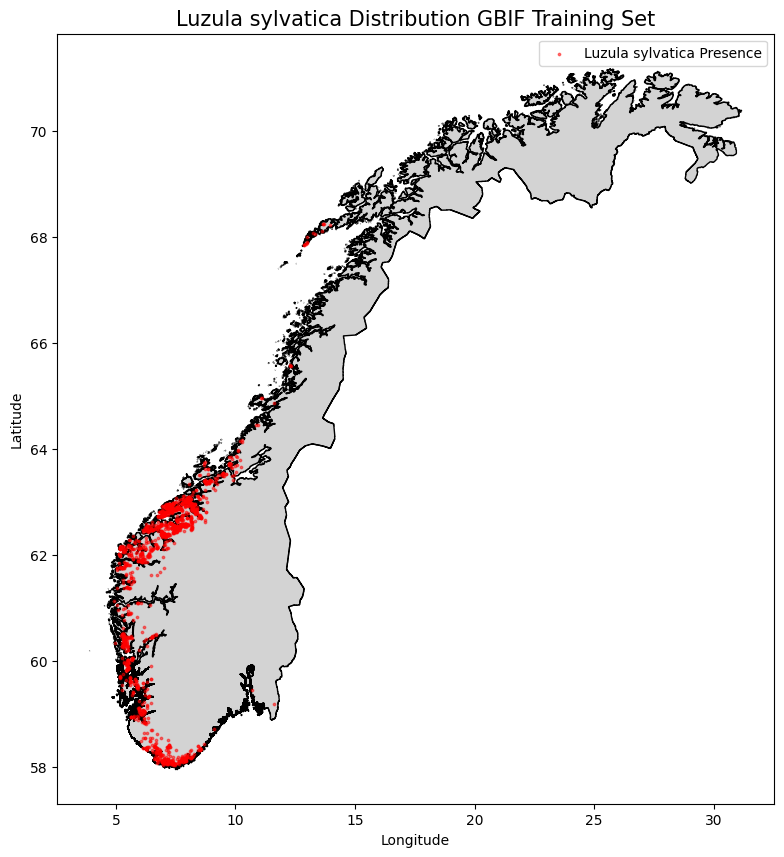

In [14]:
plotting_one_species_distribution_norway(df,'Luzula sylvatica')